<a href="https://colab.research.google.com/github/Richyboy170/Patiharn-Liangkobkit-S0238-Personal-AI/blob/main/Train_Yolov8_Object_Detection_on_Custom_Dataset_Patiharn_Liangkobkit_S0238.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.


## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Dec  3 11:12:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 94.8MB/s]

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return 

/content


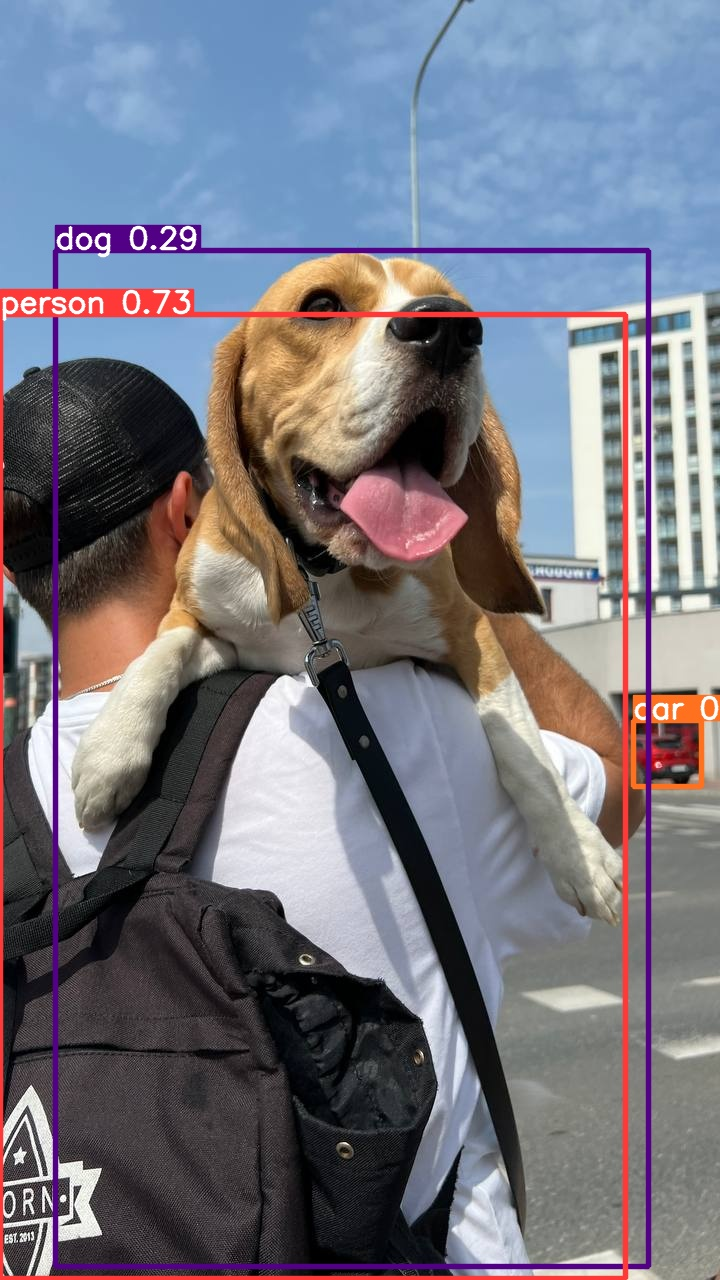

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
Ultral

In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28455], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [1]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LfgBIDlIuNyx93tAGdr6")
project = rf.workspace("kmutt-ry3v8").project("e-san-criminal-detection")
version = project.version(2)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to E-SAN-Criminal-Detection-2 in yolov8:: 100%|██████████| 134/134 [00:00<00:00, 3982.15it/s]


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Custom Training

In [2]:
%cd {HOME}

!pip install ultralytics
!pip install --upgrade torch
!pip install --upgrade ultralytics

%cd /content/E-SAN-Criminal-Detection-2

!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
/content/E-SAN-Criminal-Detection-2
100% 21.5M/21.5M [00:00<00:00, 108MB/s] 
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

In [3]:
!ls /content/E-SAN-Criminal-Detection-2

data.yaml	    README.roboflow.txt  test	valid	    yolov8s.pt
README.dataset.txt  runs		 train	yolo11n.pt


/content/E-SAN-Criminal-Detection-2


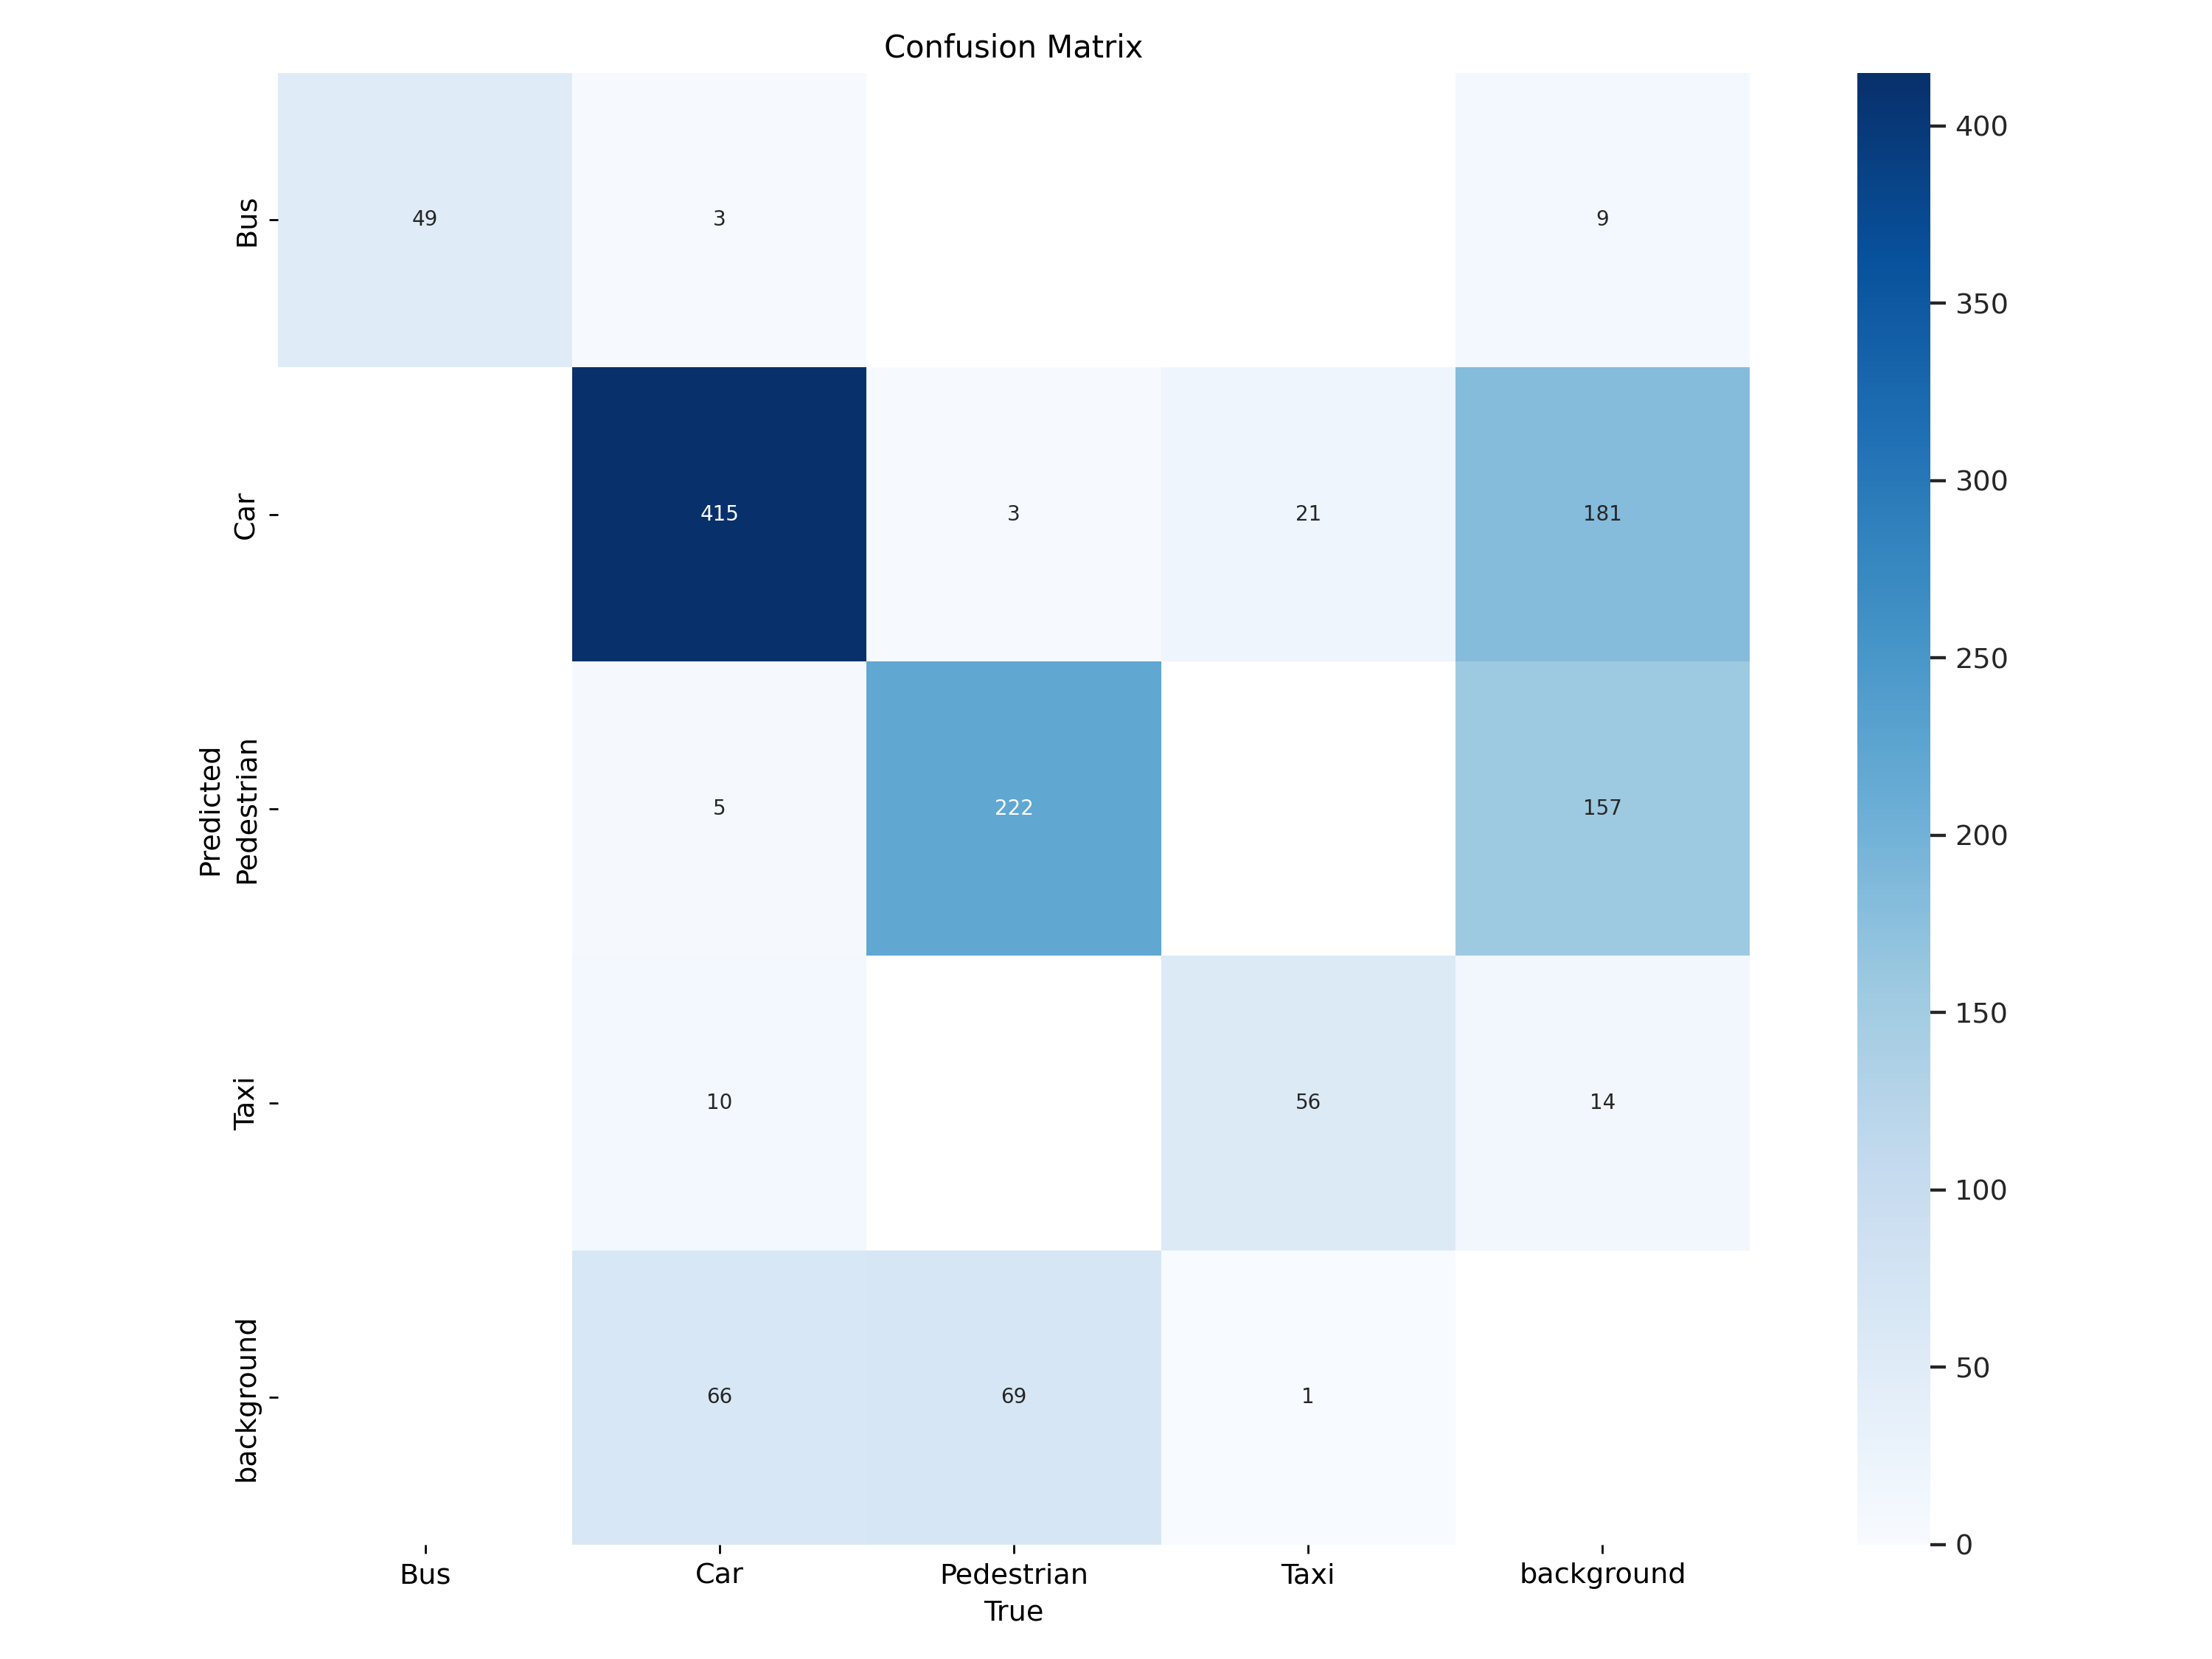

In [4]:
%cd /content/E-SAN-Criminal-Detection-2
from IPython.display import Image
Image(filename=f'/content/E-SAN-Criminal-Detection-2/runs/detect/train/confusion_matrix.png', width=600)

/content/E-SAN-Criminal-Detection-2


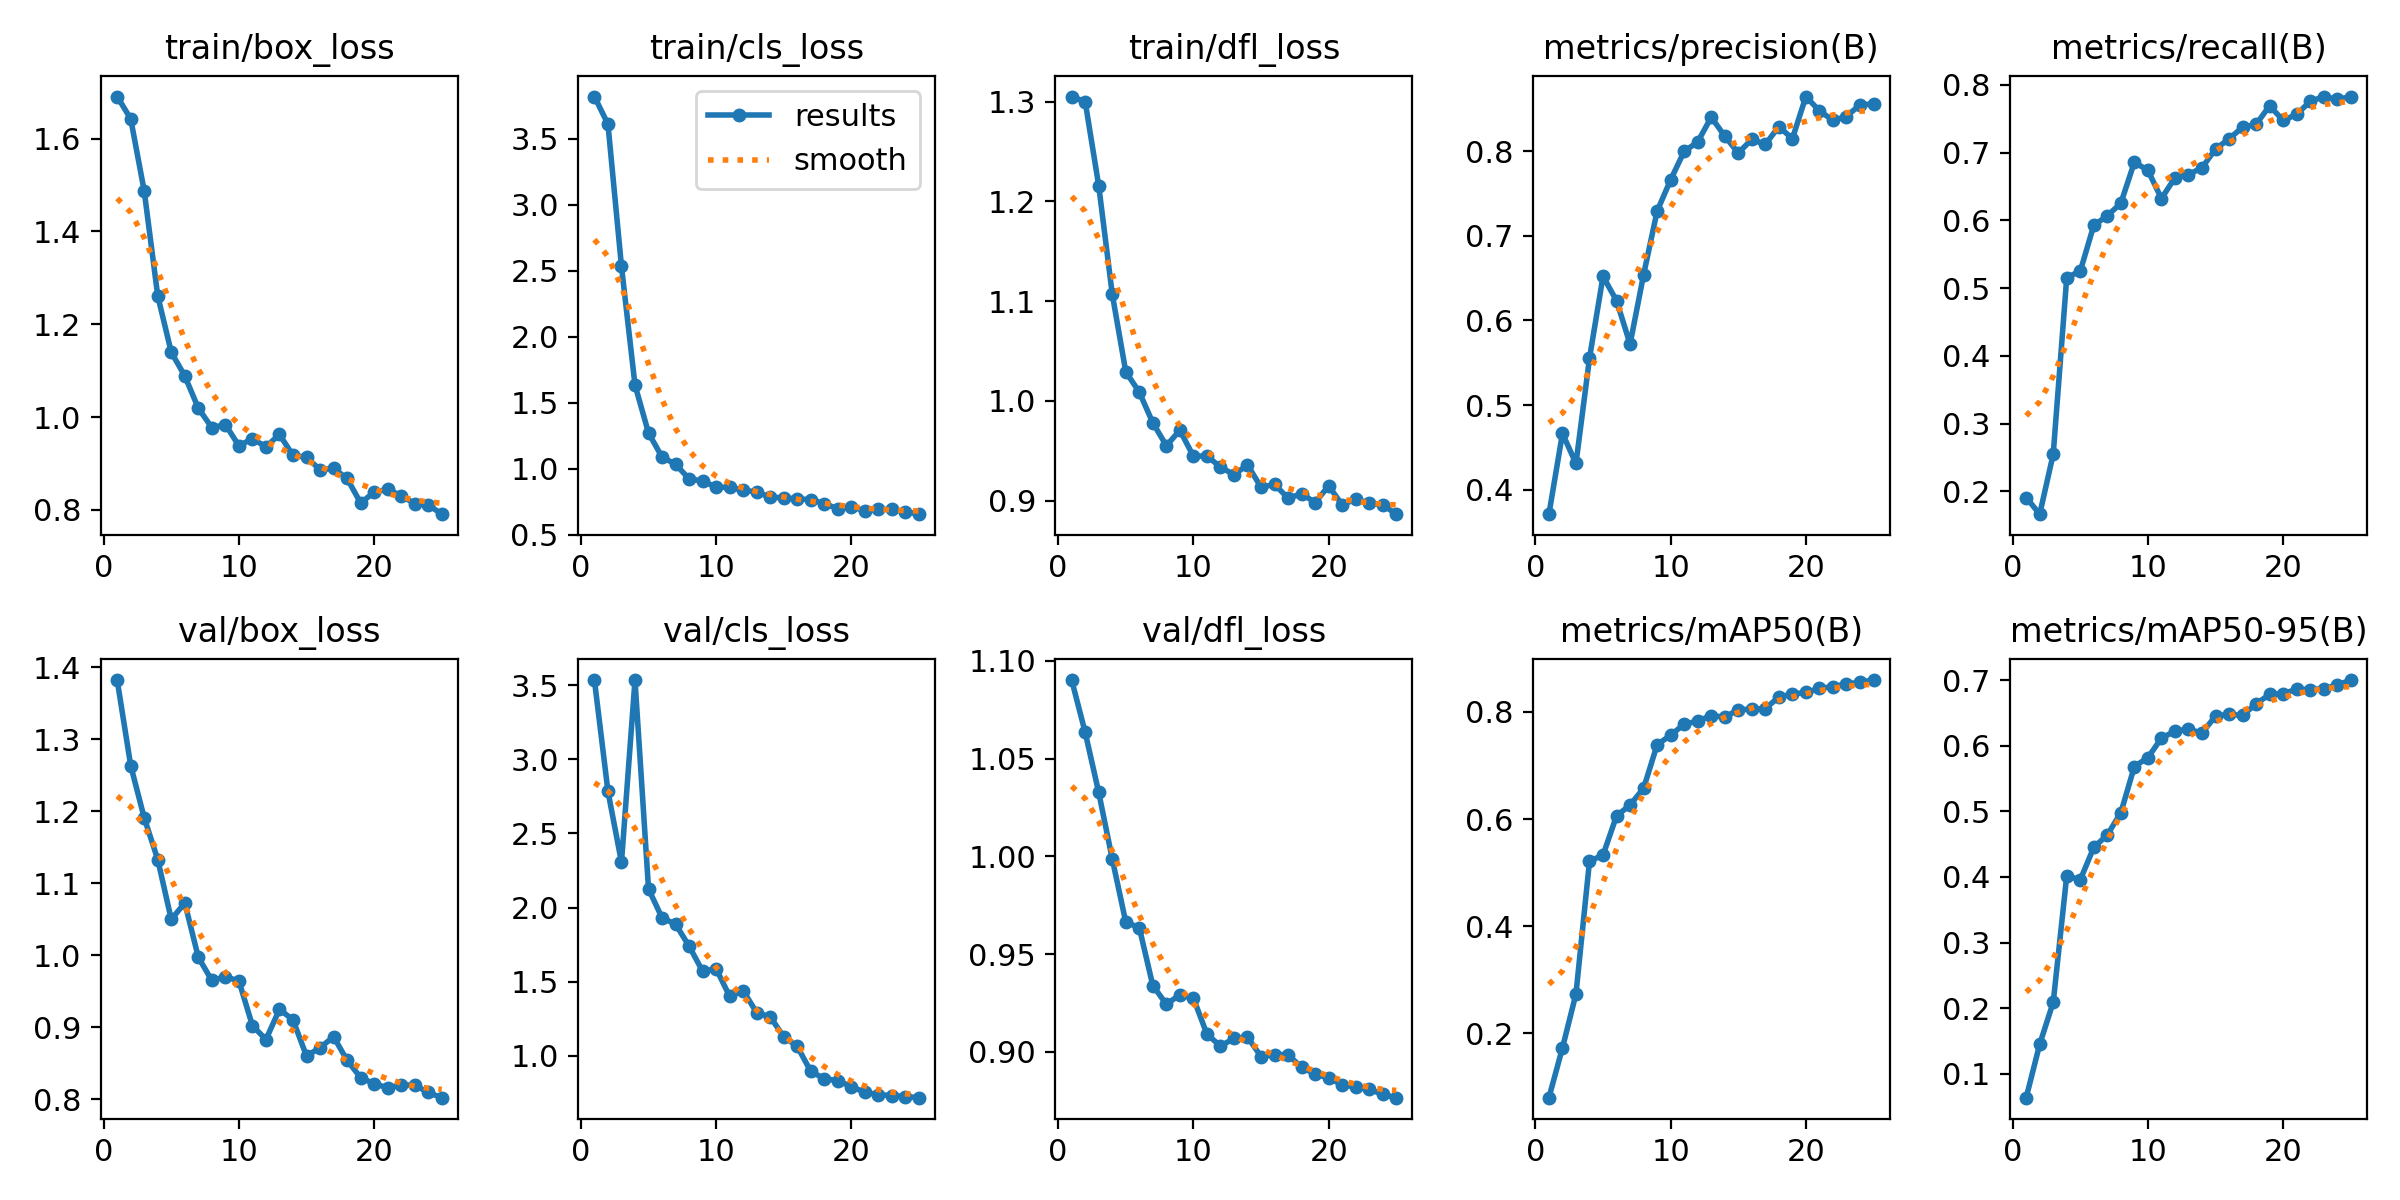

In [7]:
%cd /content/E-SAN-Criminal-Detection-2
Image(filename=f'/content/E-SAN-Criminal-Detection-2/runs/detect/train/results.png', width=600)

/content/E-SAN-Criminal-Detection-2


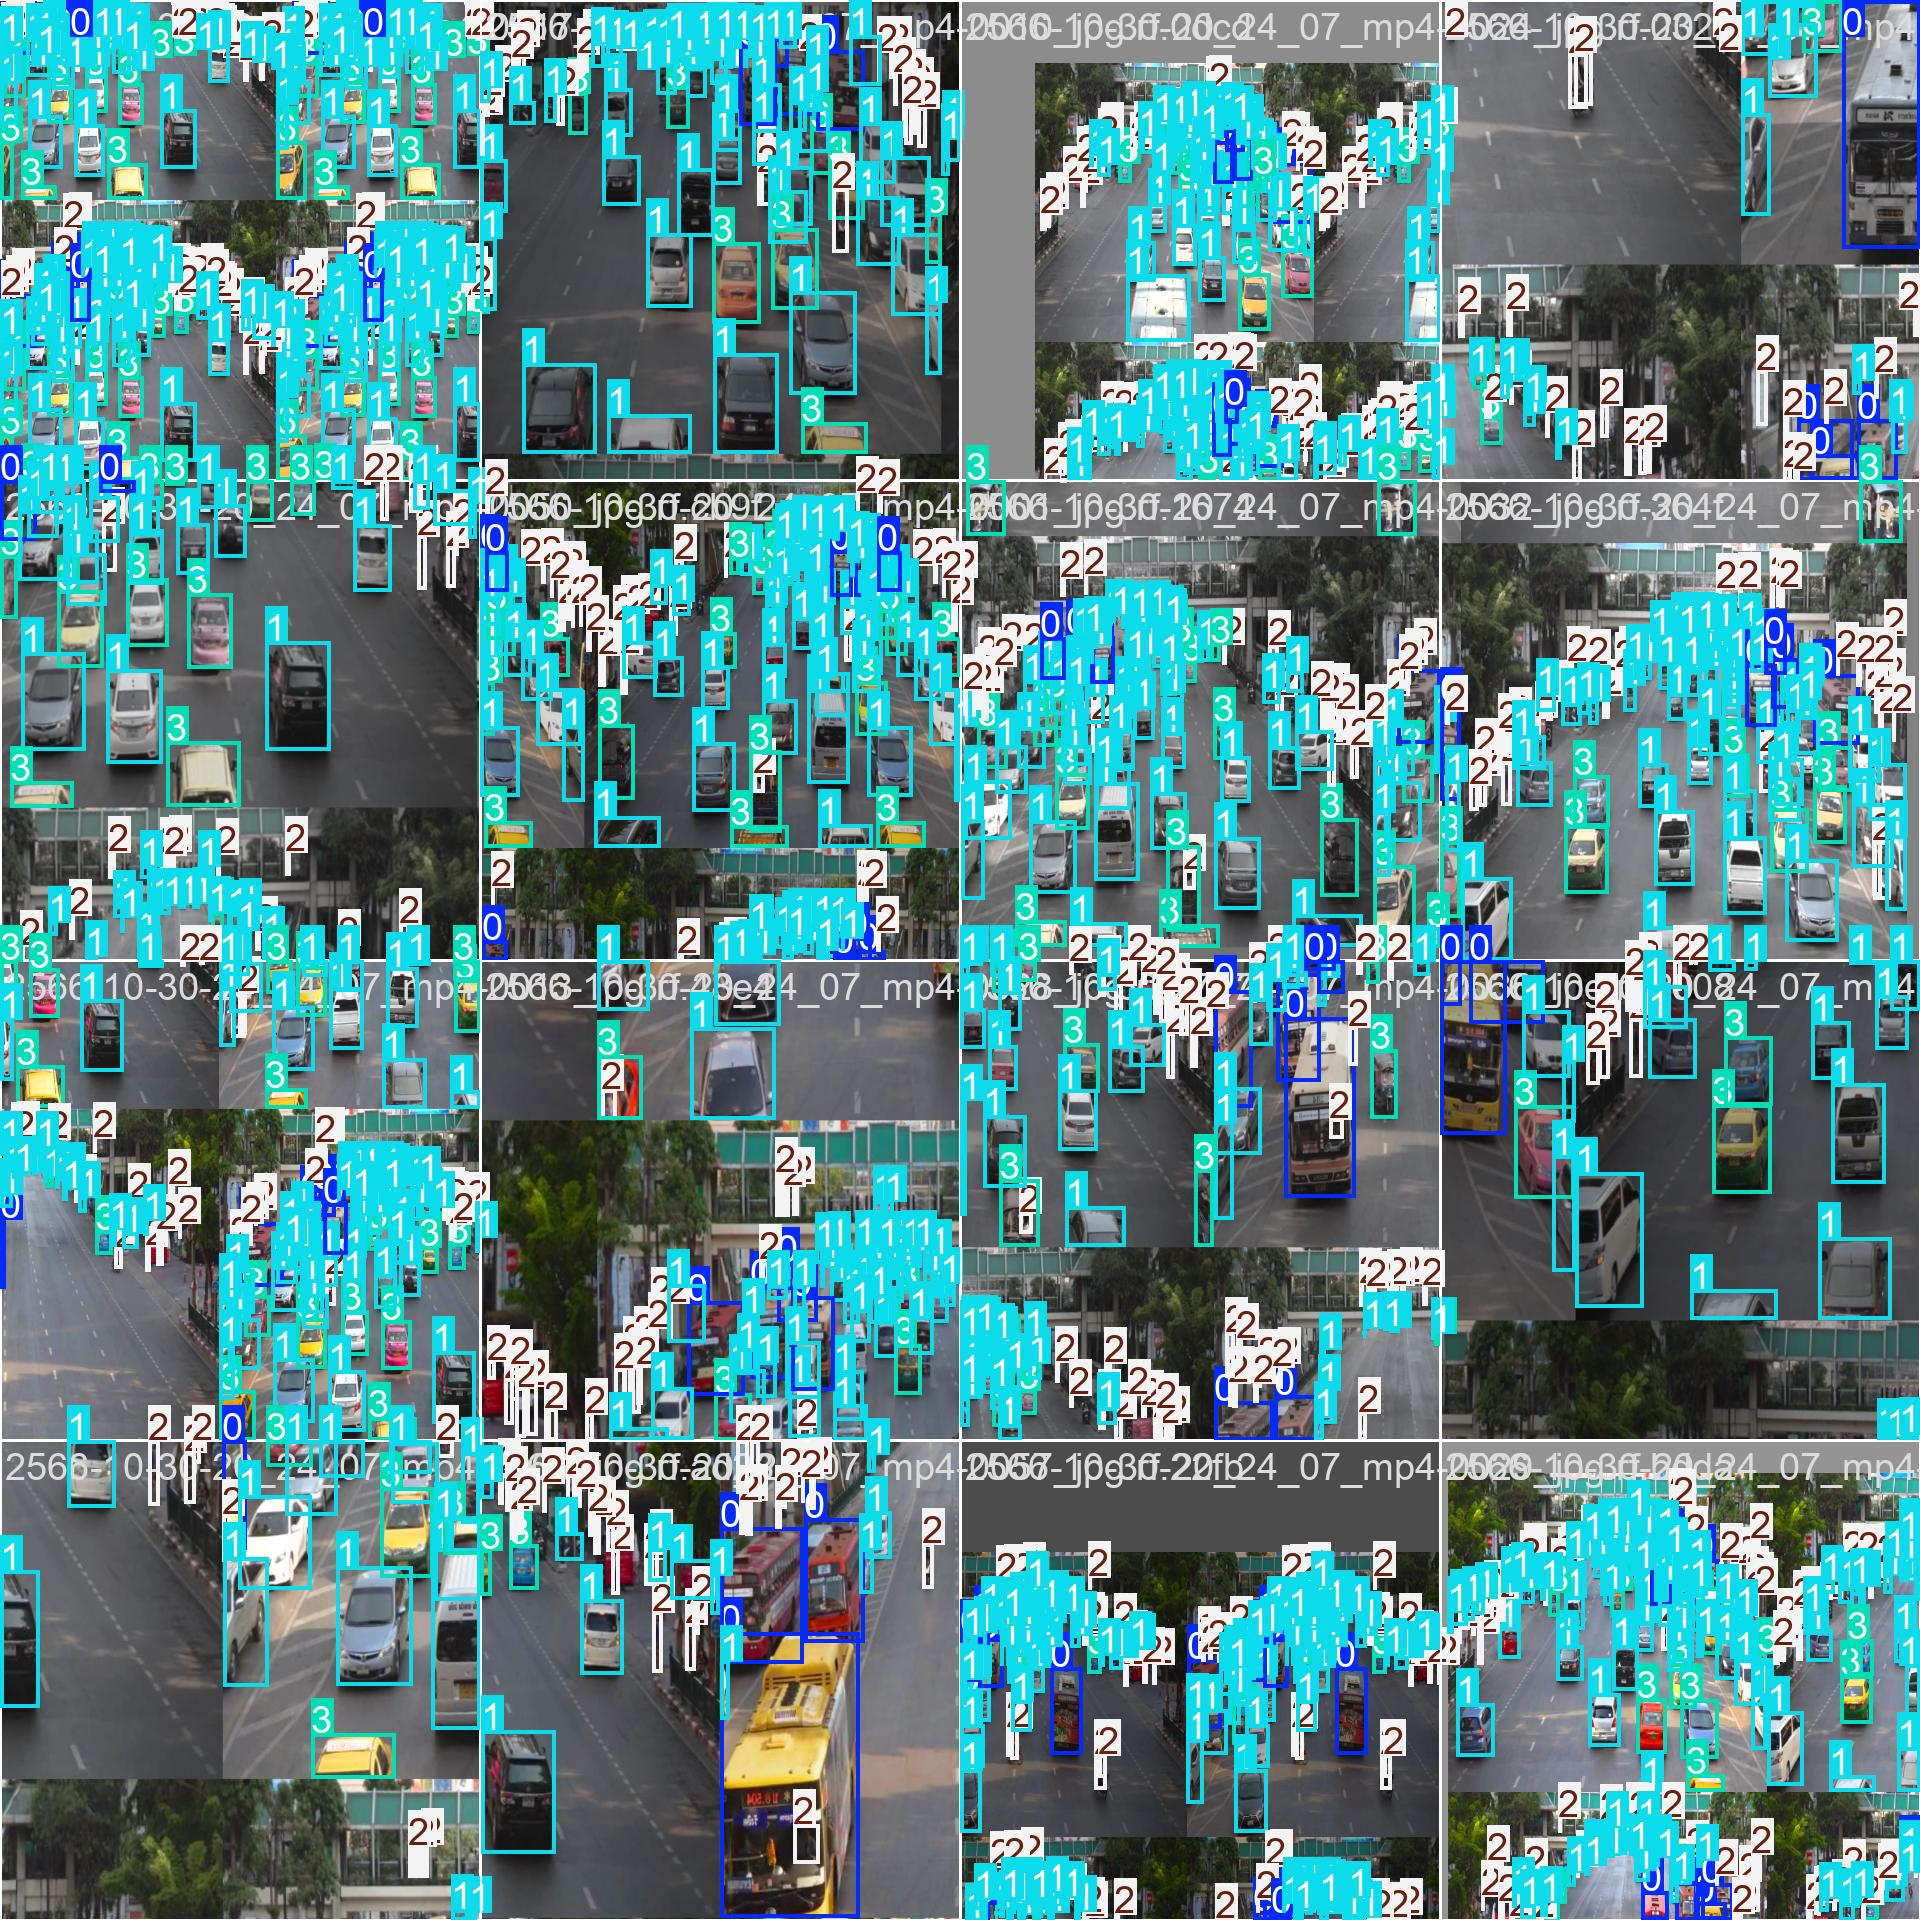

In [8]:
%cd /content/E-SAN-Criminal-Detection-2
Image(filename=f'/content/E-SAN-Criminal-Detection-2/runs/detect/train/train_batch0.jpg', width=600)

## Validate Custom Model

In [9]:
%cd /content/E-SAN-Criminal-Detection-2

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/E-SAN-Criminal-Detection-2
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 943, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 145, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 288, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 910, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 837, in torc

## Inference with Custom Model

In [10]:
%cd /content/E-SAN-Criminal-Detection-2
!yolo task=detect mode=predict model=/content/E-SAN-Criminal-Detection-2/runs/detect/train/weights/best.pt conf=0.25 source=/content/E-SAN-Criminal-Detection-2/test/images  save=True

/content/E-SAN-Criminal-Detection-2
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/6 /content/E-SAN-Criminal-Detection-2/test/images/2566-10-30-20_24_07_mp4-0031_jpg.rf.dfef20849310ac7f51a827288ba2feb8.jpg: 800x800 9 Buss, 61 Cars, 26 Pedestrians, 4 Taxis, 22.8ms
image 2/6 /content/E-SAN-Criminal-Detection-2/test/images/2566-10-30-20_24_07_mp4-0038_jpg.rf.9bf569c910f6182fbca71d8d8b13ee88.jpg: 800x800 9 Buss, 38 Cars, 31 Pedestrians, 4 Taxis, 22.9ms
image 3/6 /content/E-SAN-Criminal-Detection-2/test/images/2566-10-30-20_24_07_mp4-0039_jpg.rf.e5b6a8175ce6c24cd66a13520255a5d5.jpg: 800x800 8 Buss, 45 Cars, 37 Pedestrians, 3 Taxis, 22.8ms
image 4/6 /content/E-SAN-Criminal-Detection-2/test/images/2566-10-30-20_24_07_mp4-0041_jpg.rf.ff0fb48fca7210528750e6990b67eecf.jpg: 800x800 7 Buss, 33 Cars, 38 Pedestrians, 3 Taxis, 22.8ms
image 5/6 /content/E-SAN-Criminal-Detectio

**NOTE:** Let's take a look at few results.

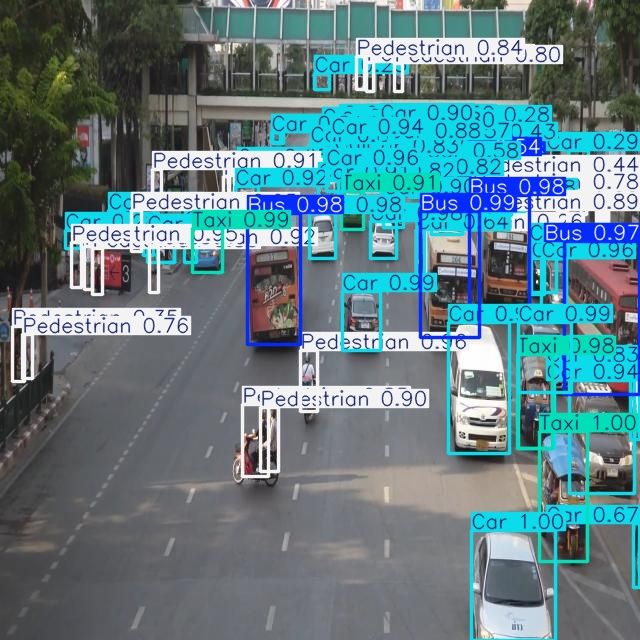

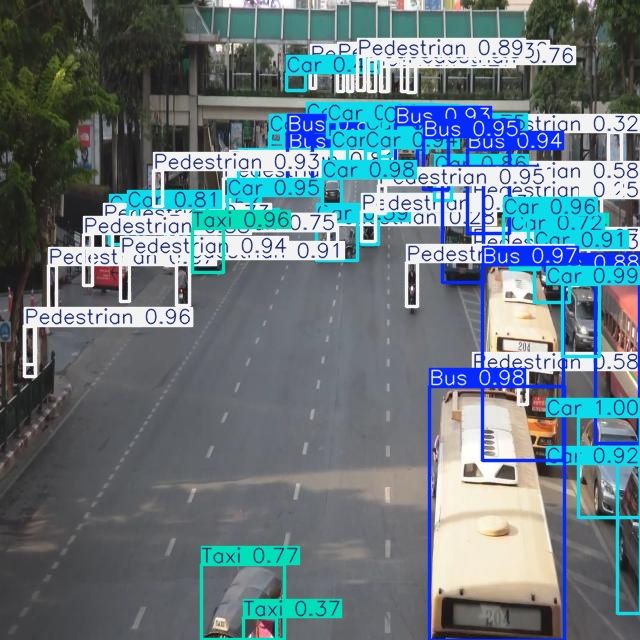

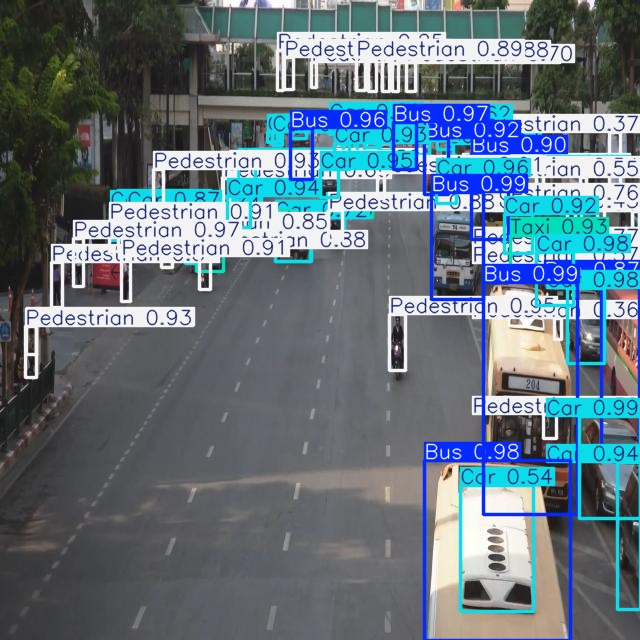

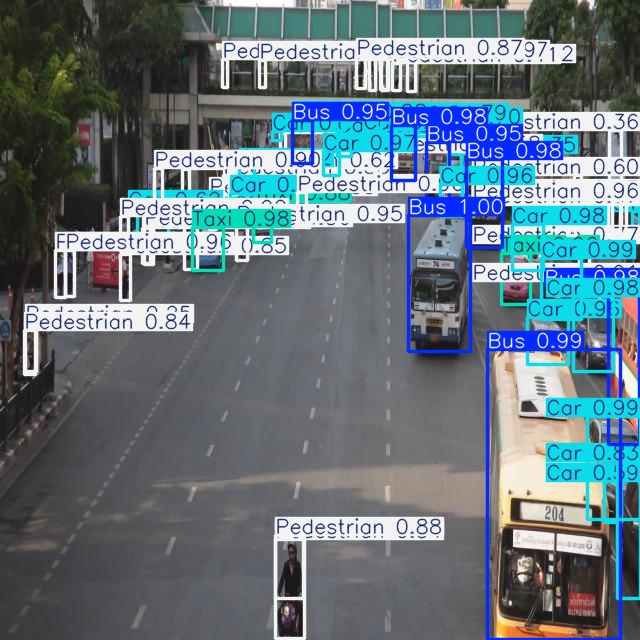

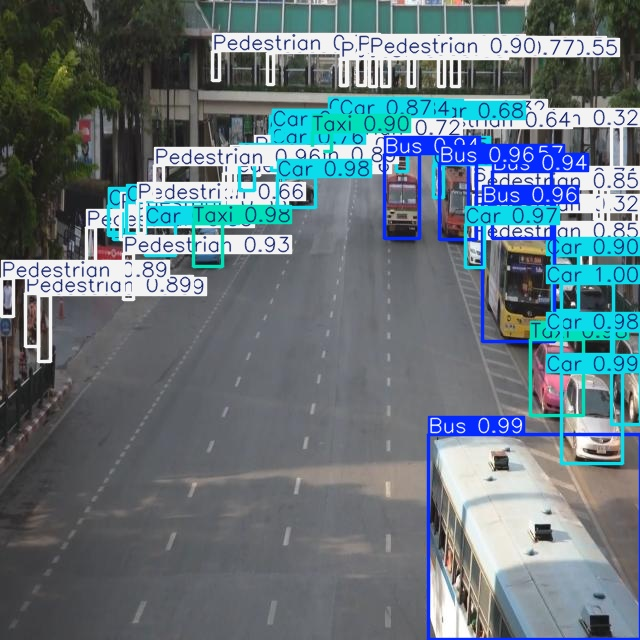

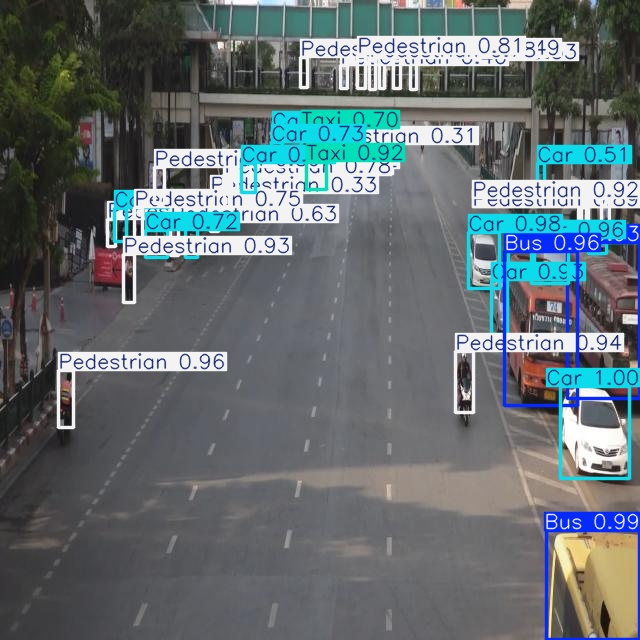

In [11]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/E-SAN-Criminal-Detection-2/runs/detect/predict/2566-10-30-20_24_07_mp4-0031_jpg.rf.dfef20849310ac7f51a827288ba2feb8.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

for image_path in glob.glob(f'/content/E-SAN-Criminal-Detection-2/runs/detect/predict/2566-10-30-20_24_07_mp4-0038_jpg.rf.9bf569c910f6182fbca71d8d8b13ee88.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

for image_path in glob.glob(f'/content/E-SAN-Criminal-Detection-2/runs/detect/predict/2566-10-30-20_24_07_mp4-0039_jpg.rf.e5b6a8175ce6c24cd66a13520255a5d5.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

for image_path in glob.glob(f'/content/E-SAN-Criminal-Detection-2/runs/detect/predict/2566-10-30-20_24_07_mp4-0041_jpg.rf.ff0fb48fca7210528750e6990b67eecf.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

for image_path in glob.glob(f'/content/E-SAN-Criminal-Detection-2/runs/detect/predict/2566-10-30-20_24_07_mp4-0047_jpg.rf.c76250ffca7573b971e1dff6fbb6aa08.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

for image_path in glob.glob(f'/content/E-SAN-Criminal-Detection-2/runs/detect/predict/2566-10-30-20_24_07_mp4-0059_jpg.rf.9e29d64f8e4a5ae88483a6ff67e37d9b.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")